In [1]:
library(Seurat)
library(dplyr)
library(patchwork)
library(RColorBrewer)
library(wesanderson)
library(ggplot2)

Attaching SeuratObject

Attaching sp


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
nuclei.integrated <- readRDS("./processed_data/nuclei.integrated_1000_7000_30_30_neuron2200_final_2_updated.rds")

In [3]:
#islolate inhibitory neurons
Idents(object = nuclei.integrated) <- 'cell_class'
interneurons <- subset(nuclei.integrated, idents = 'Interneurons')
interneurons <- subset(interneurons, subset = nFeature_RNA > 2600)

In [4]:
#redo PCA
interneurons <- FindVariableFeatures(object = interneurons)
interneurons <- RunPCA(interneurons, features = VariableFeatures(object = interneurons))

Warning message in FindVariableFeatures.Assay(object = assay.data, selection.method = selection.method, :
“selection.method set to 'vst' but count slot is empty; will use data slot instead”
Warning message in eval(predvars, data, env):
“NaNs produced”
Warning message in hvf.info$variance.expected[not.const] <- 10^fit$fitted:
“number of items to replace is not a multiple of replacement length”
PC_ 1 
Positive:  LDB2, PTPRK, SV2B, MEIS2, AC011287.1, SATB2, ARPP21, RORB, BASP1-AS1, IQCJ-SCHIP1 
	   LMO3, MAPK4, TAFA1, LINC02241, POU6F2, DPYD, ANO3, SLC1A2, DLGAP1-AS4, LY86-AS1 
	   MYH9, CA10, AL117329.1, MAML2, FSTL4, SLIT3, GPM6A, NRG1, LMO4, B4GALNT3 
Negative:  GAD1, GRIP1, GRIK1, GAD2, ZNF385D, GRIP2, VWC2, ANK1, BTBD11, NHS 
	   NXPH1, KCNC2, C8orf34, PTCHD4, TOX3, LHX6, ANKRD55, SPOCK3, SYNPR, DLX6-AS1 
	   KIAA1211, UBASH3B, ERBB4, CNTN5, ZNF536, AC087457.1, IGF1, TIAM1, TOX2, RBMS3 
PC_ 2 
Positive:  POSTN, LHX6, MYO5B, RGS5, SOX6, RASGRF2, NXPH1, GRIK3, SCN1A-AS1, TMEM132C 
	   

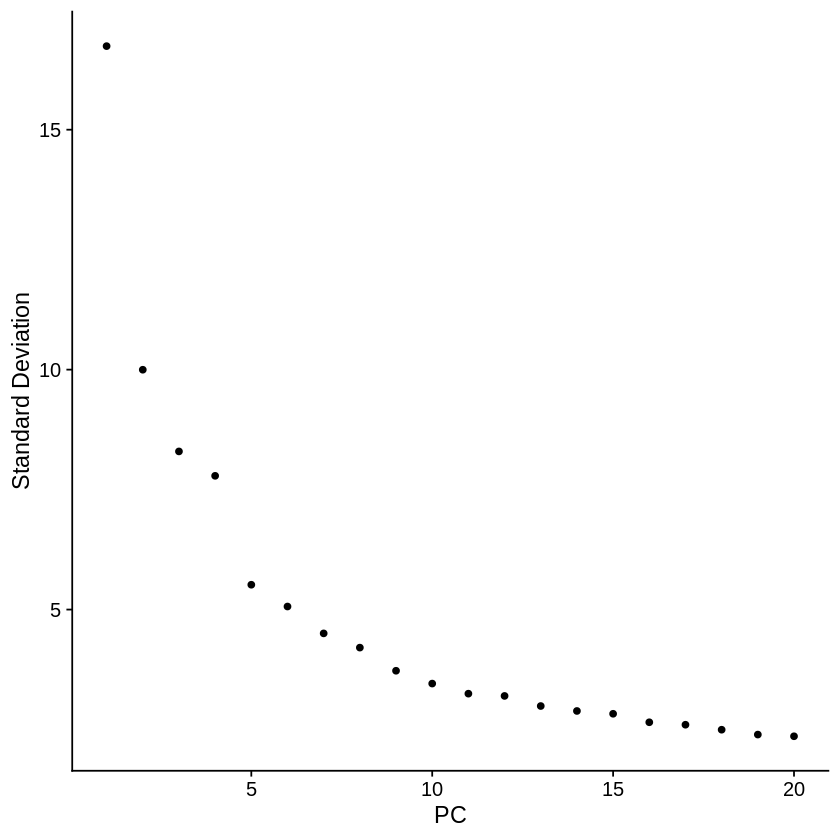

In [5]:
ElbowPlot(interneurons)

In [6]:
#redo umap
interneurons <- FindNeighbors(interneurons, k.param = 30,dims = 1:20)
interneurons <- RunUMAP(interneurons, dims = 1:20)

Computing nearest neighbor graph

Computing SNN

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
15:01:06 UMAP embedding parameters a = 0.9922 b = 1.112

15:01:06 Read 7442 rows and found 20 numeric columns

15:01:06 Using Annoy for neighbor search, n_neighbors = 30

15:01:06 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

15:01:06 Writing NN index file to temp file /tmp/RtmpTK2dEA/file2a4530f8204f

15:01:06 Searching Annoy index using 1 thread, search_k = 3000

15:01:08 Annoy recall = 100%

15:01:08 Commencing smooth kNN distance cali

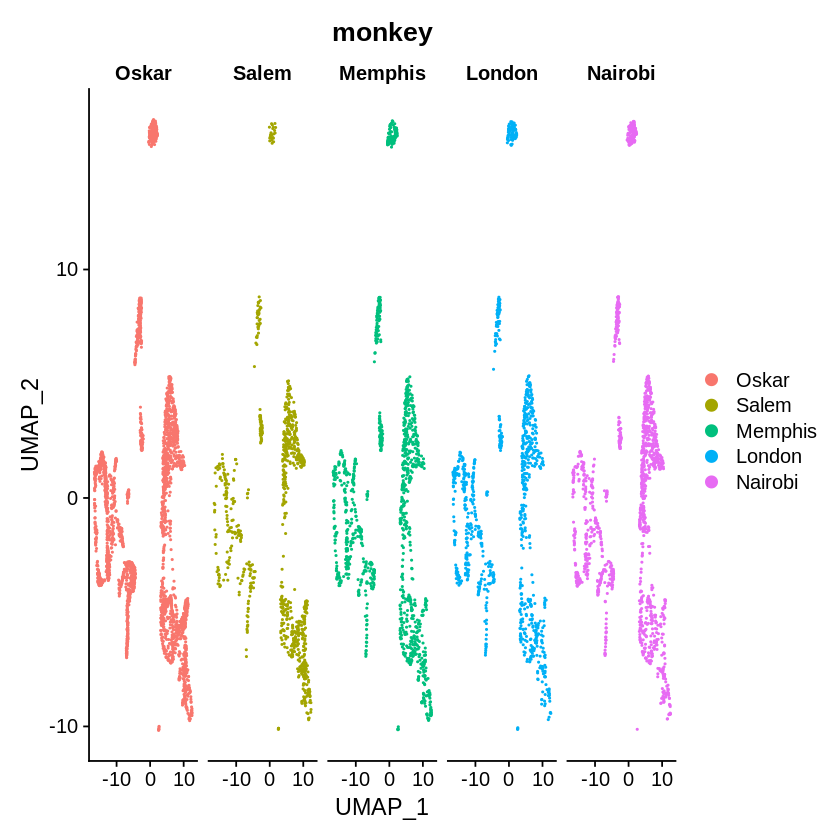

In [7]:
#AnimalPlot
DimPlot(interneurons,group.by = "monkey",split.by="monkey")

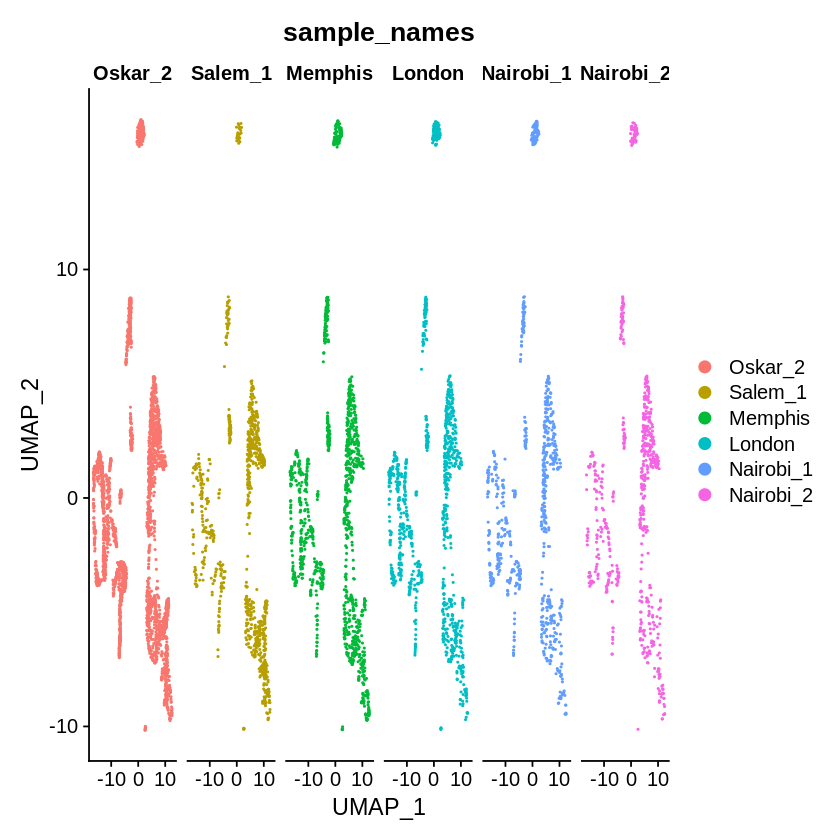

In [8]:
#Sample plots
DimPlot(interneurons, reduction = "umap", group.by = "sample_names",split.by="sample_names")

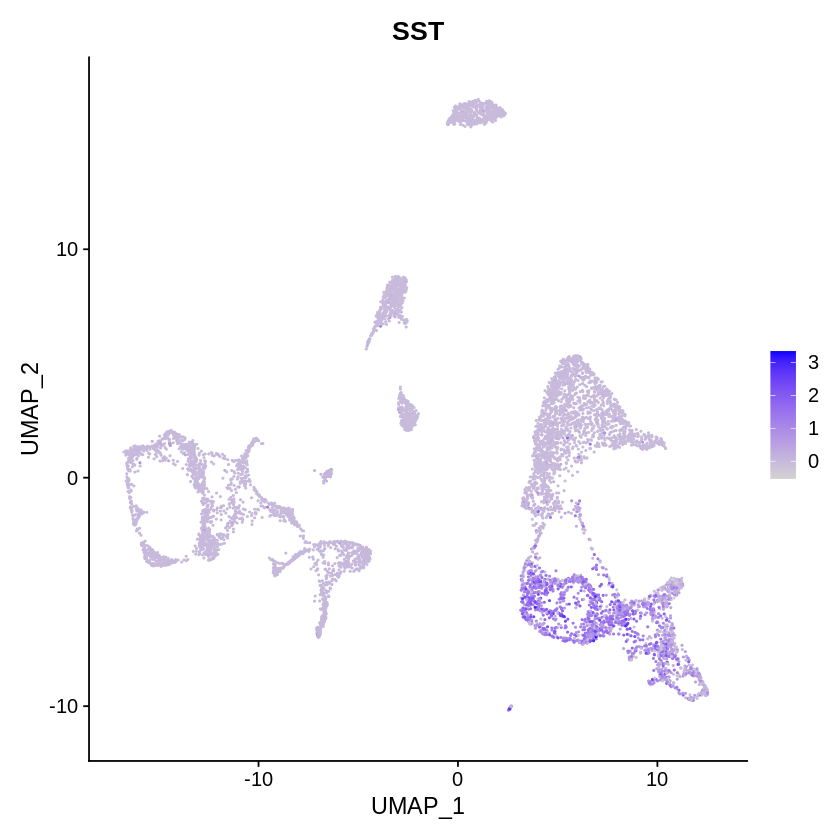

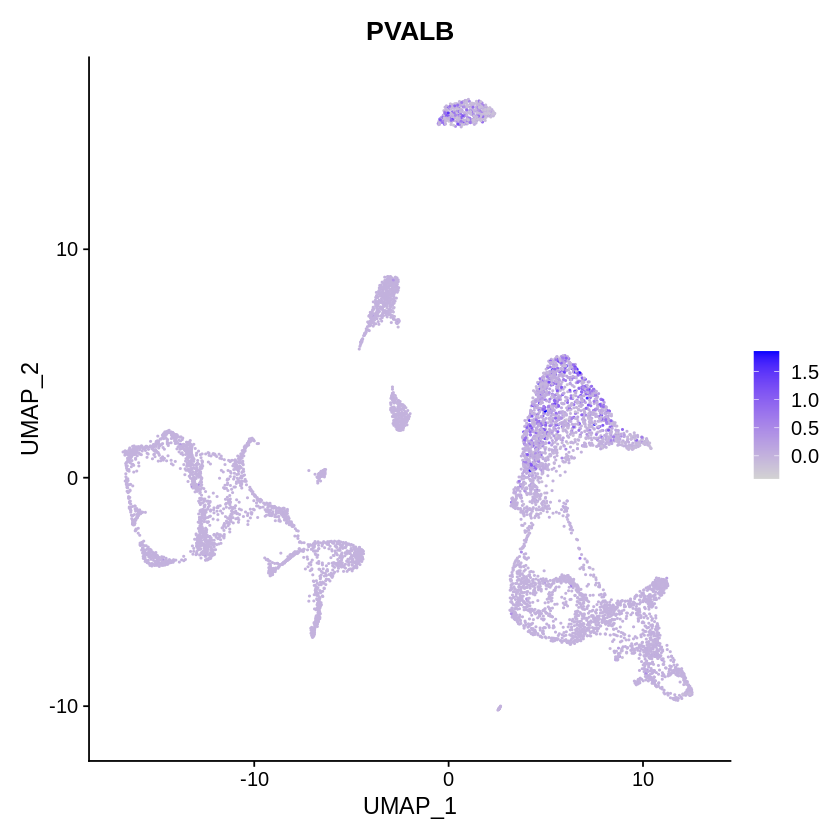

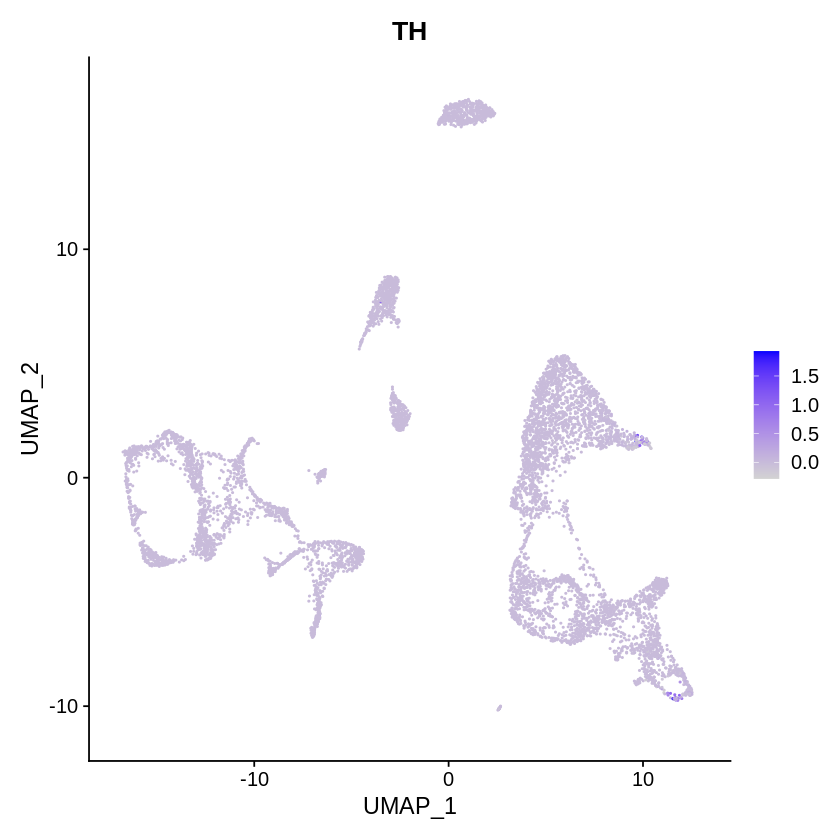

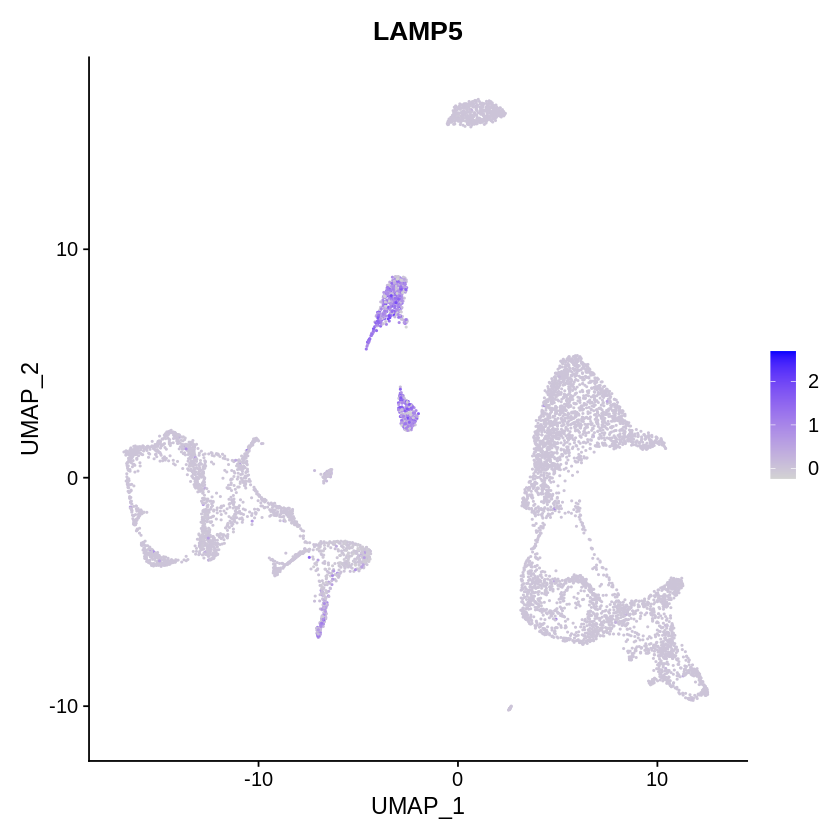

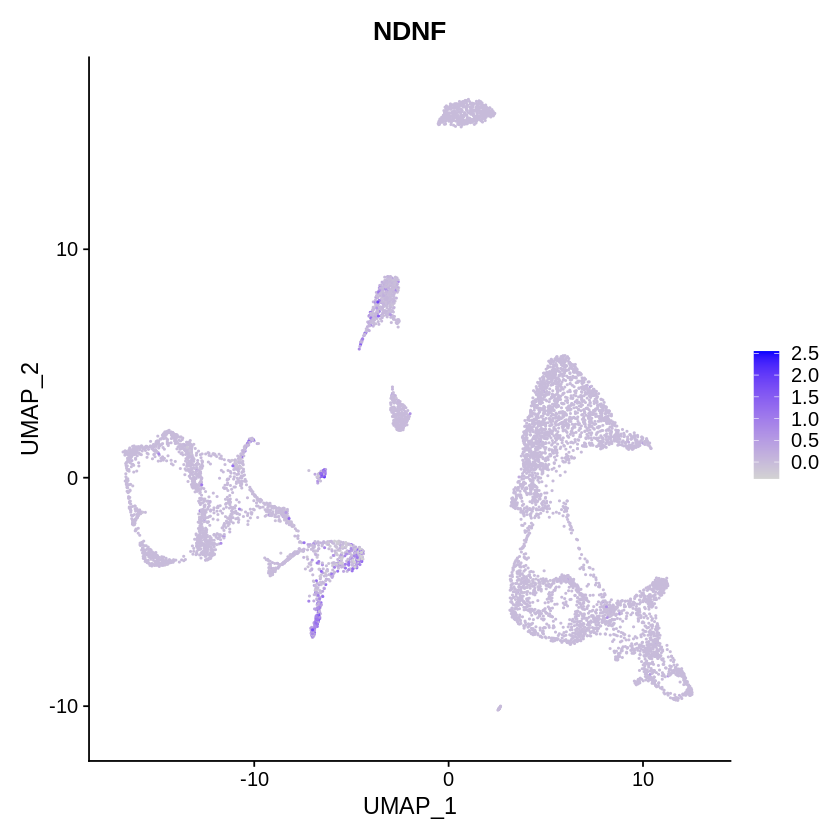

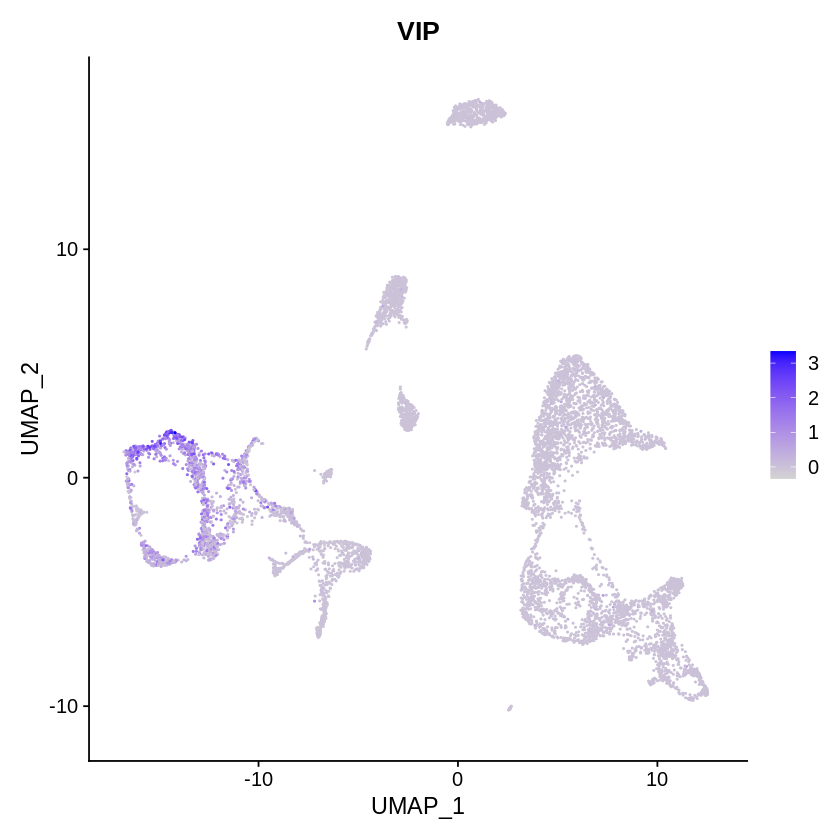

In [10]:
FeaturePlot(interneurons, features = c('SST'))+scale_fill_gradientn(colors = brewer.pal(5,"Blues"))
FeaturePlot(interneurons, features = c('PVALB'))+scale_fill_gradientn(colors = brewer.pal(5,"Blues"))
FeaturePlot(interneurons, features = c('TH'))+scale_fill_gradientn(colors = brewer.pal(5,"Blues"))
FeaturePlot(interneurons, features = c('LAMP5'))+scale_fill_gradientn(colors = brewer.pal(5,"Blues"))
FeaturePlot(interneurons, features = c('NDNF'))+scale_fill_gradientn(colors = brewer.pal(5,"Blues"))
FeaturePlot(interneurons, features = c('VIP'))+scale_fill_gradientn(colors = brewer.pal(5,"Blues"))

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 7442
Number of edges: 455120

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9293
Number of communities: 14
Elapsed time: 0 seconds


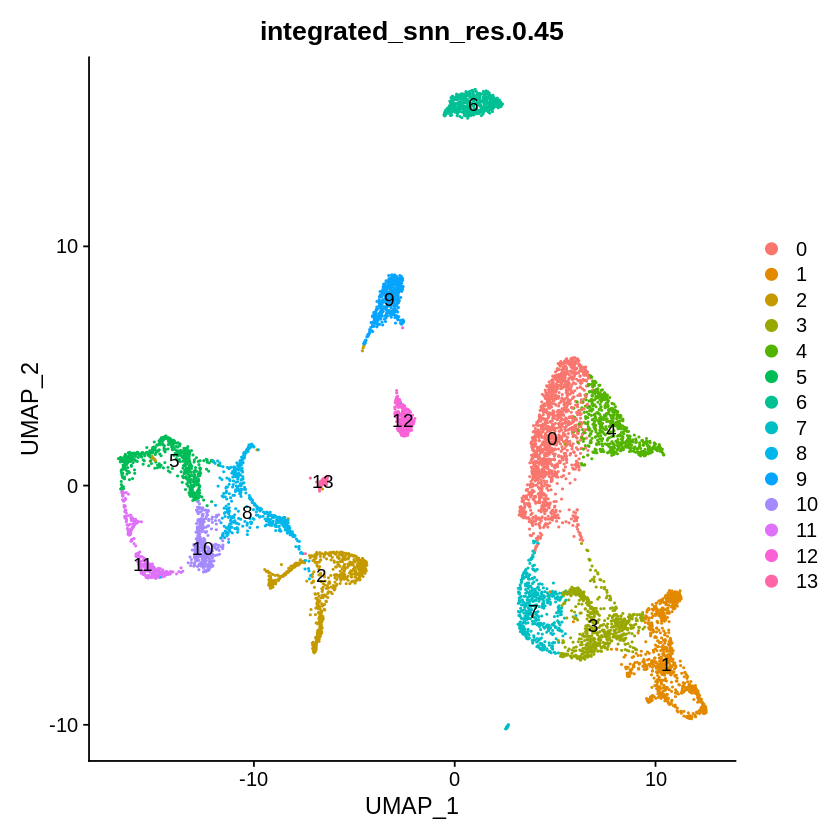

In [11]:
interneurons <- FindClusters(interneurons, resolution = 0.45)
DimPlot(interneurons, reduction = "umap", group.by = "integrated_snn_res.0.45",label=TRUE)

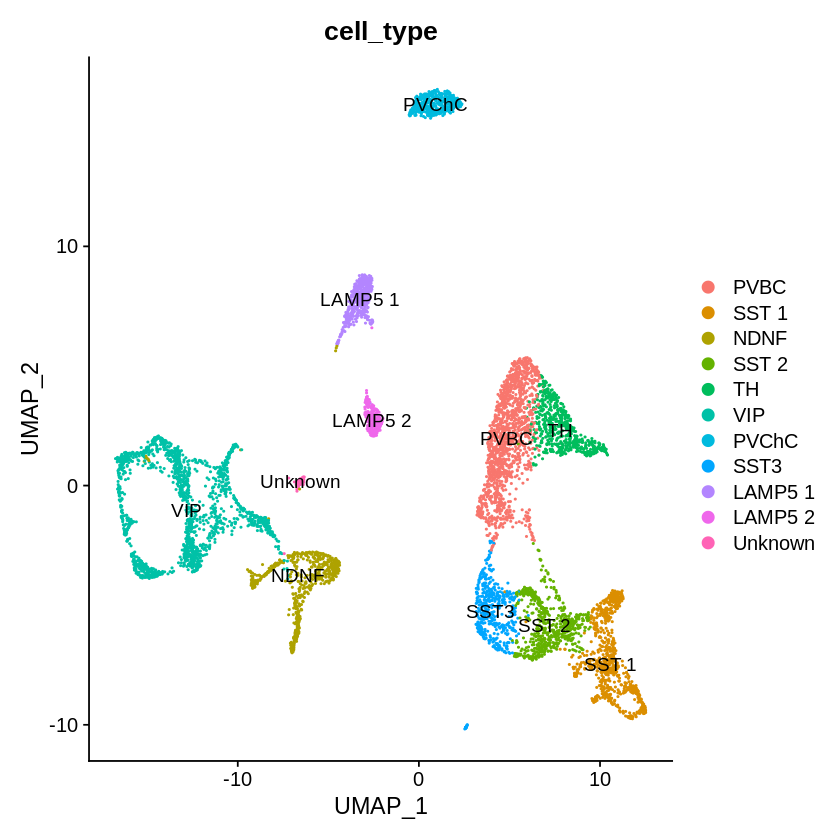

In [12]:
Idents(object = interneurons) <- 'integrated_snn_res.0.45'
interneurons <- RenameIdents(object = interneurons,'0' = 'PVBC', '1' = 'SST 1', '2' = 'NDNF','3' = 'SST 2', '4' = 'TH', '5' = 'VIP','6' = 'PVChC', '7' = 'SST3' , '8' = 'VIP',
                       '9' = 'LAMP5 1', '10' = 'VIP', '11' = 'VIP', '12' = 'LAMP5 2', '13' = 'Unknown')
interneurons@meta.data$cell_type = Idents(object = interneurons)
DimPlot(interneurons,group.by = "cell_type",label=TRUE)

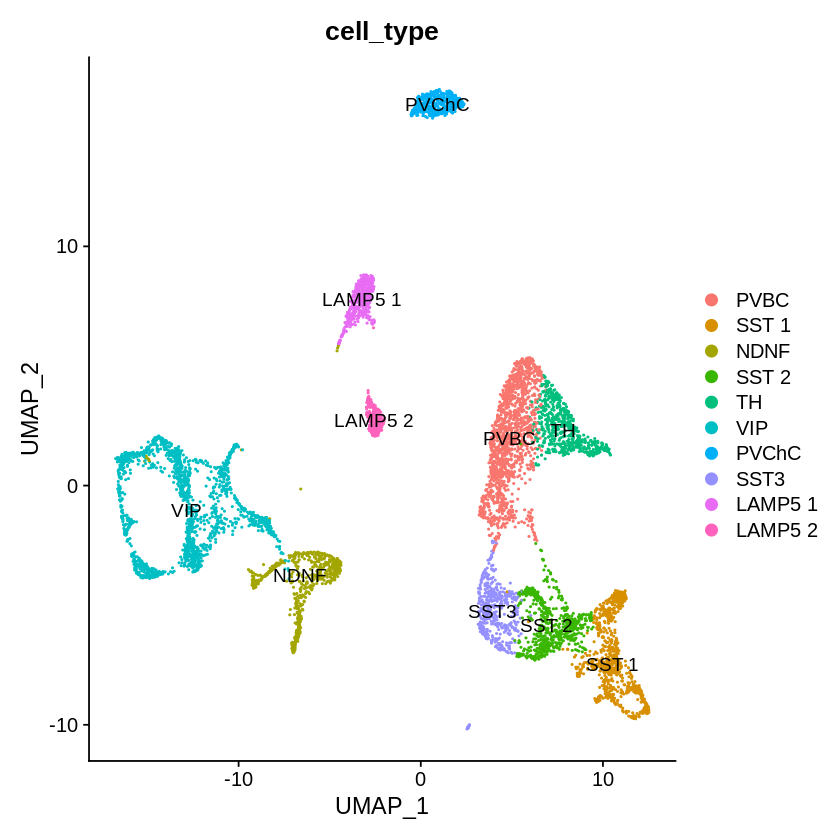

In [13]:
#Unknown cells were removed
Idents(object = interneurons) <- 'cell_type'
interneurons <- subset(interneurons, cell_type!= "Unknown")
DimPlot(interneurons, reduction = "umap", group.by = "cell_type",label=TRUE)

In [14]:
interneurons$integrated_snn_res.0.45 <- NULL

In [2]:
# saveRDS(interneurons, file = "./processed_data/interneurons_1_updated.rds")
interneurons <- readRDS("./processed_data/interneurons_1_updated.rds")